# Fase 4: Visualización de los Datos

#### 1. Importamos el archivo csv e instalamos las extensiones necesarias

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/transform_data/data_clean.csv', low_memory=False)

## Explicación de las Visualizaciones

En esta fase de visualización, es crucial seleccionar gráficas que nos ayuden a entender mejor los patrones, tendencias y relaciones dentro de los datos. Las visualizaciones deben ser elegidas en función de las preguntas que queremos responder y de la naturaleza de los datos. A continuación, se explica el razonamiento detrás de las visualizaciones seleccionadas:

#### 1. **Histograma sobre jugadores internacionales:** 

La cantidad de jugadores convocados a selecciones nacionales es una variable numérica discreta que nos ayuda a entender cómo están distribuidos estos jugadores entre los equipos. Un histograma es ideal para visualizar esta distribución. Con esta gráfica podemos observar:
- Si la mayoría de los equipos tienen pocos o muchos jugadores en selecciones nacionales.
- Si la distribución es uniforme o si hay un número reducido de equipos con una gran cantidad de jugadores convocados.
- La dispersión de los datos, lo que nos ayuda a identificar si hay clubes que sobresalen significativamente respecto a los demás.<br><br>

#### 2. **Gráfico de Barras Apiladas entre los clubes con más victorias como locales o visitantes:** 

Este gráfico nos permite comparar cómo los equipos distribuyen sus partidos entre local y visitante y si hay alguna tendencia en cuanto a la localía. Con esta visualización podemos observar:
- Cuáles son los equipos que han jugado más partidos en casa y cuáles han jugado más como visitantes.
- Si hay equipos que tienen un rendimiento muy marcado según la localía.
- Diferencias en la cantidad total de partidos disputados entre los equipos analizados.<br><br>

#### 3. **Boxplot entre la capacidad del estadio y las victorias:** 

Este boxplot nos ayuda a visualizar cómo se distribuyen las victorias en función del tamaño del estadio de cada equipo. Con esta gráfica podemos analizar:
- Si los equipos con estadios más grandes tienden a ganar más partidos.
- La dispersión de los datos y si hay valores atípicos que influyen en los resultados.
- Si existe una tendencia clara entre la capacidad del estadio y el éxito del equipo.<br><br>

#### 4. **Gráfico de Barras entre los equipos con más partidos jugados:** 

Este gráfico nos permite ver cuántos partidos ha ganado cada equipo, ayudando a identificar a los equipos más exitosos y aquellos con menor rendimiento. Con esta visualización podemos analizar:
- Cuáles son los equipos con mayor número de victorias y si hay una diferencia significativa entre ellos.
- Equipos con menos victorias y su posible relación con otros factores (como plantillas más pequeñas o menos jugadores en selecciones).
- Si existe una brecha notable entre los mejores y los peores equipos en términos de victorias.<br><br>

#### 5. **Gráfico de Dispersión entre la capacidad del estadio y los jugadores internacionales:** 

Este scatter plot nos ayuda a entender si hay una relación entre la capacidad del estadio y la cantidad de jugadores en selecciones nacionales. Con esta visualización podemos observar:
- Si los equipos con estadios más grandes tienen más jugadores convocados.
- La posible existencia de una correlación entre la infraestructura del club y la calidad de su plantilla.
- Si hay valores atípicos, es decir, equipos con estadios pequeños pero con muchos jugadores en selecciones o viceversa.<br><br>

#### 6. **Boxplot entre la media de edad de la plantilla y las victorias:**

Este boxplot nos permite analizar cómo la edad promedio de los equipos influye en sus resultados. Con esta visualización podemos observar:
- Si los equipos con una mayor edad promedio tienen un mejor rendimiento.
- Si hay mucha variabilidad en la edad de los equipos y si esto tiene un impacto en las victorias.
- La existencia de valores atípicos, es decir, equipos con edades muy diferentes a la media y su relación con el éxito.<br><br>

#### 7. **Gráfico de Barras Apiladas entre la posición del equipo en el partido y las victorias o derrotas:**

Este gráfico nos ayuda a entender cómo afecta jugar en casa o de visitante en los resultados de los partidos. Con esta visualización podemos observar:
- Si hay una clara ventaja de localía, es decir, si los equipos ganan más partidos cuando juegan en casa.
- Si hay equipos que logran buenos resultados independientemente de dónde juegan.
- Cómo se distribuyen las victorias en función de la localía y si esto es un factor clave en los resultados.<br><br>

#### 8. **Boxplot entre el tamaño de la plantilla y las victorias del equipo:** 

Este boxplot nos ayuda a ver si el tamaño de la plantilla tiene un impacto en el rendimiento del equipo. Con esta visualización podemos analizar:
- Si los equipos con plantillas más grandes tienden a ganar más partidos.
- Si hay una gran dispersión en los tamaños de las plantillas o si la mayoría de los equipos tienen tamaños similares.
- Si existe una relación clara entre la cantidad de jugadores y el éxito del equipo en los partidos.

#### 2. Histograma columna 'national_team_players'

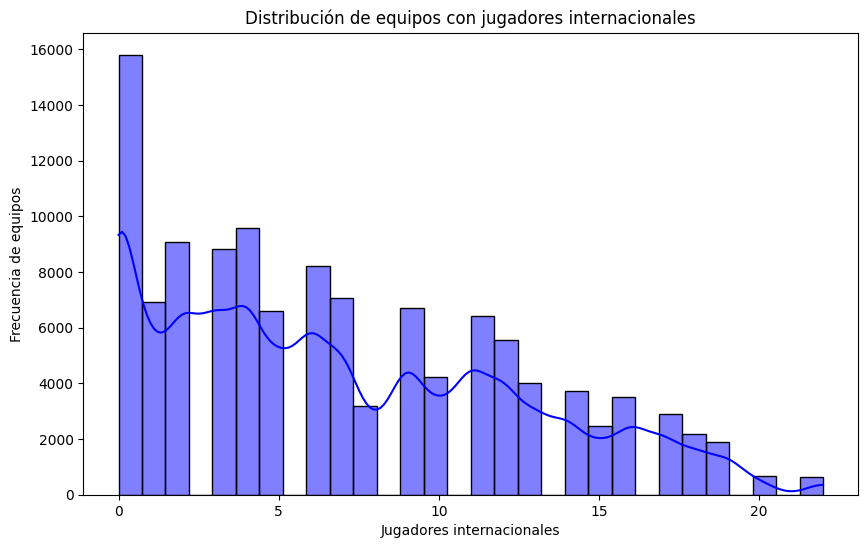

In [13]:
# Podemos observar la frecuencia de jugadores internacionales en los equipos
plt.figure(figsize=(10, 6))
sns.histplot(df['national_team_players'], kde=True, bins=30, color='blue')
plt.title('Distribución de equipos con jugadores internacionales')
plt.xlabel('Jugadores internacionales')
plt.ylabel('Frecuencia de equipos')
plt.show()

#### 3. Gráfico de Barras Apiladas 'name' vs 'hosting'

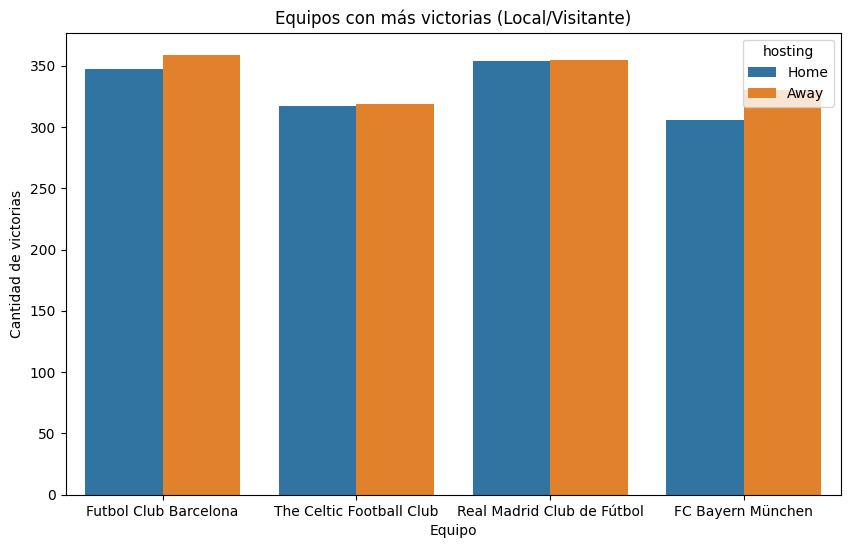

In [14]:
# Filtrar los 4 equipos con más victorias
equipos_con_mas_victorias = df.groupby('name')['is_win'].mean().nlargest(4).index
df_filtrado = df[df['name'].isin(equipos_con_mas_victorias)]

# Gráfico para representar los equipos con mas victorias como local o visitante
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='name', hue='hosting')
plt.title('Equipos con más victorias (Local/Visitante)')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de victorias')
plt.show()

#### 4. Boxplot entre 'is_win' y 'stadium_seats'

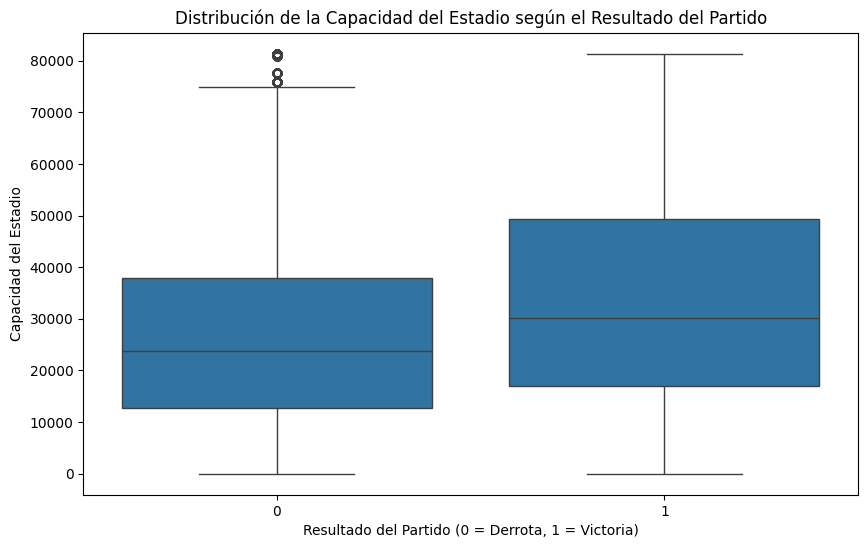

In [15]:
# Boxplot entre la capacidad del estadio y si influye en el resultado del partido
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_win', y='stadium_seats')
plt.title('Distribución de la Capacidad del Estadio según el Resultado del Partido')
plt.xlabel('Resultado del Partido (0 = Derrota, 1 = Victoria)')
plt.ylabel('Capacidad del Estadio')
plt.show()

#### 5. Gráfico de Barras 'name' vs 'is_win'

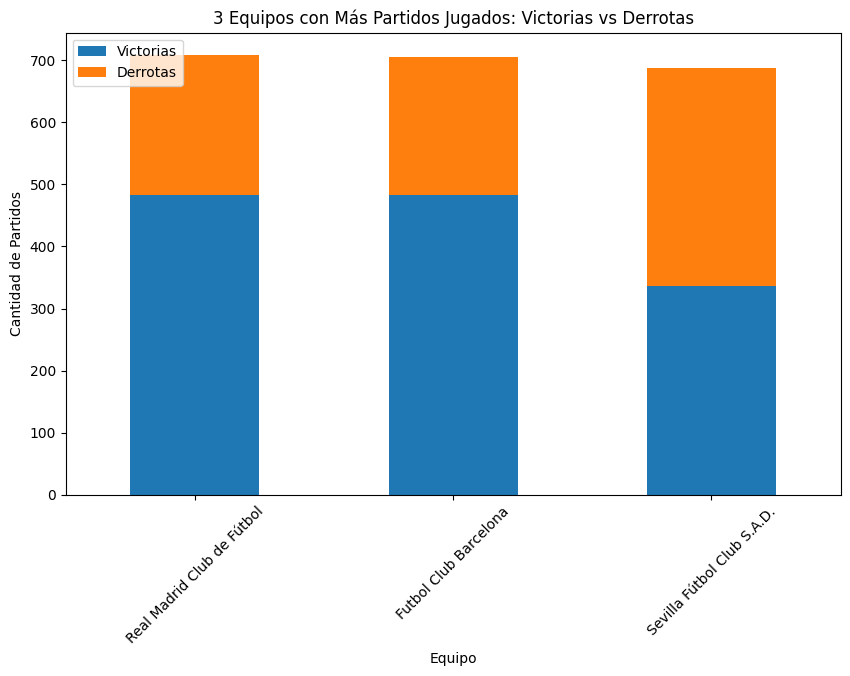

In [16]:
# Calculamos la cantidad de partidos jugados, victorias y derrotas por equipo
partidos_por_equipo = df.groupby('name')['is_win'].agg(['count', 'sum'])
partidos_por_equipo['derrotas'] = partidos_por_equipo['count'] - partidos_por_equipo['sum']

# Seleccionamos los 3 equipos con más partidos jugados
top_3_equipos = partidos_por_equipo.nlargest(3, 'count')

# Creamos el gráfico de barras apiladas
top_3_equipos[['sum', 'derrotas']].plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizamos la gráfica
plt.title('3 Equipos con Más Partidos Jugados: Victorias vs Derrotas')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Partidos')
plt.xticks(rotation=45)
plt.legend(['Victorias', 'Derrotas'], loc='upper left')
plt.show()

#### 6. Gráfico de dispersión entre 'stadium_seats' y 'national_team_players'

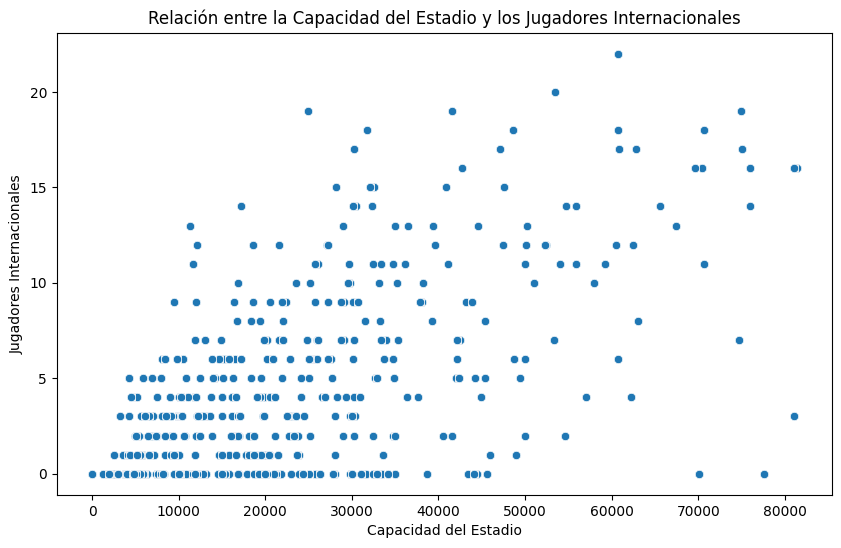

In [17]:
# Gráfico de dispersión entre la capacidad del estadio y el número de jugadores internacionales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stadium_seats', y='national_team_players')
plt.title('Relación entre la Capacidad del Estadio y los Jugadores Internacionales')
plt.xlabel('Capacidad del Estadio')
plt.ylabel('Jugadores Internacionales')
plt.show()

#### 7. Boxplot entre 'is_win' y 'average_age'

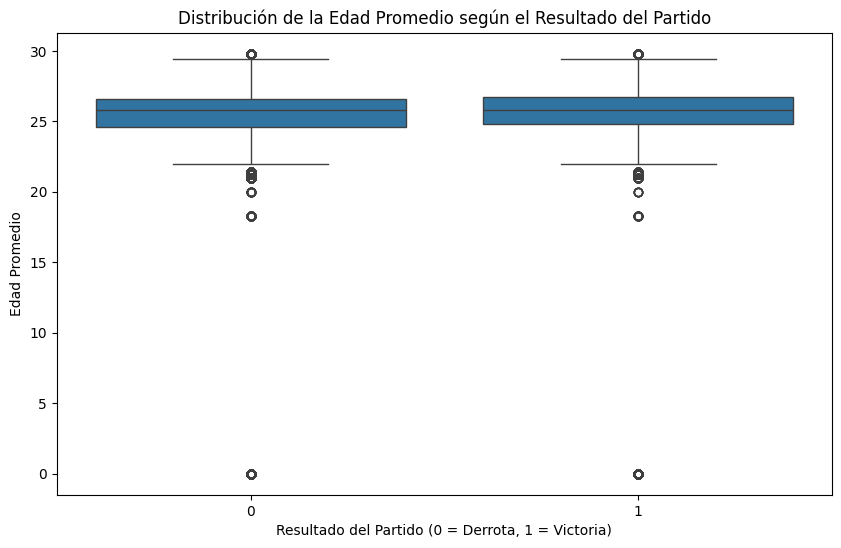

In [18]:
# Boxplot entre la media de edad de la plantilla y partidos ganados
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_win', y='average_age')
plt.title('Distribución de la Edad Promedio según el Resultado del Partido')
plt.xlabel('Resultado del Partido (0 = Derrota, 1 = Victoria)')
plt.ylabel('Edad Promedio')
plt.show()

#### 8. Gráfico de Barras Apiladas entre 'is_win' y 'hosting'

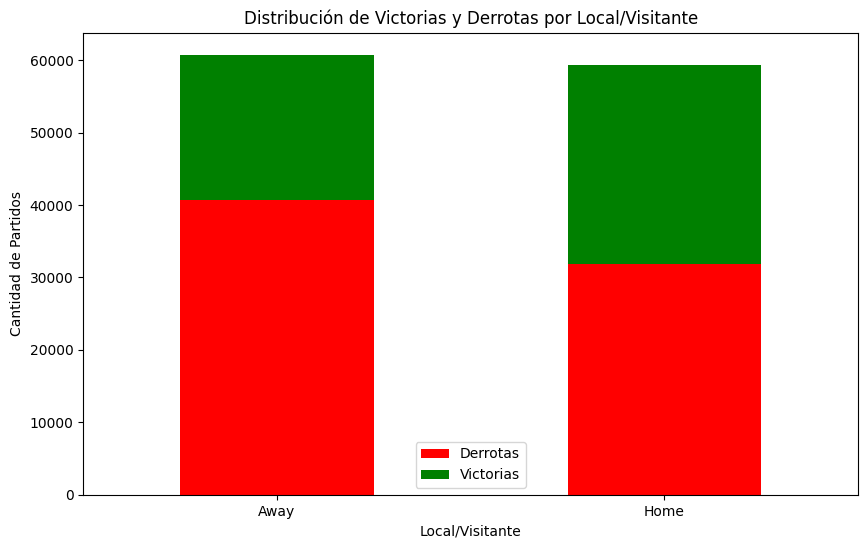

In [19]:
# Agrupamos por 'hosting' (si el equipo fue local o visitante) y 'is_win' (victoria o derrota)
df_grouped = df.groupby(['hosting', 'is_win']).size().unstack(fill_value=0)

# Creamos gráfico de barras apiladas
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

plt.title('Distribución de Victorias y Derrotas por Local/Visitante')
plt.xlabel('Local/Visitante')
plt.ylabel('Cantidad de Partidos')
plt.xticks(rotation=0)
plt.legend(['Derrotas', 'Victorias'])
plt.show()

#### 9. Boxplot entre 'is_win' y 'squad_size'

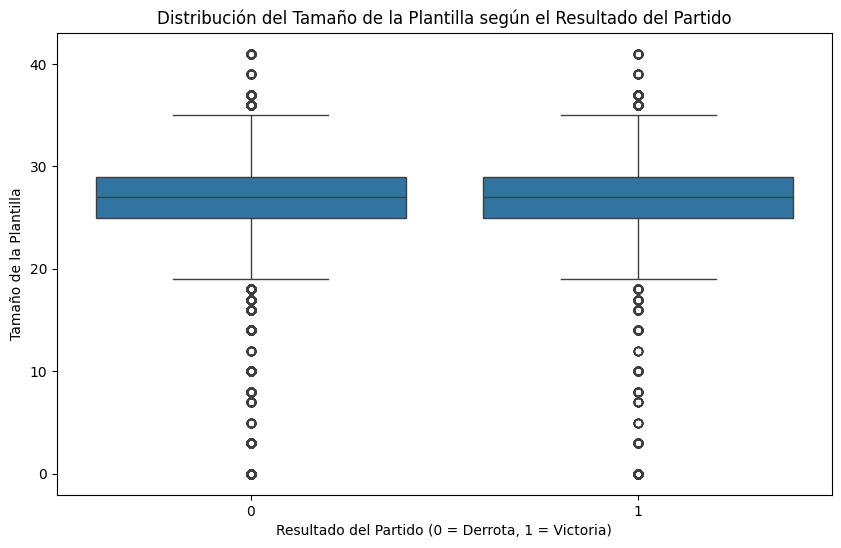

In [20]:
# Boxplot entre el tamaño de la plantilla y los partidos ganados
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_win', y='squad_size')
plt.title('Distribución del Tamaño de la Plantilla según el Resultado del Partido')
plt.xlabel('Resultado del Partido (0 = Derrota, 1 = Victoria)')
plt.ylabel('Tamaño de la Plantilla')
plt.show()

## Conclusiones de las Visualizaciones 

**1. Histograma sobre jugadores internacionales:** La mayoría de los clubes tienen pocos jugadores convocados a selecciones nacionales, pero hay algunos equipos con una cantidad considerable. Esto sugiere que solo unos pocos clubes tienen plantillas con jugadores de alto nivel internacional. En cuanto a números, más de 15000 equipos no tienen ningún jugador convocado con la selección, y solo unos 500 equipos aportan 20 jugadores o más con la selección.<br><br>

**2. Gráfico de Barras Apiladas entre los clubes con más victorias como locales o visitantes:** Podemos observar como el FC Barcelona y el Bayern Munchen tienen una mayor cantidad de victorias como visitantes. Real Madrid y Celtic tienen el mismo número de victorias tanto de locales, como de visitantes. Estos datos indican que los 4 equipos obtienen siempre un gran resultado como visitantes (tiene una mayor dificultad respecto a ser local).<br><br>

**3. Boxplot entre la capacidad del estadio y las victorias:** Podemos observar como la capacidad del estadio, está relacionada con las victorias del equipo. Un estadio con una capacidad pequeña tiene menor número de victorias, que un estadio con una gran capacidad. Por lo tanto, la capacidad influye en el resultado del equipo.<br><br>

**4. Gráfico de Barras entre los equipos con más partidos jugados:** Podemos observar como los tres equipos con más partidos disputados son españoles. El Real Madrid es el equipo con más victorias, superando mínimamente al FC Barcelona. Sin embargo, el tercer equipo (Sevilla FC), tiene muchas menos victorias prácticamente con los mismos partidos disputados.<br><br>

**5. Gráfico de Dispersión entre la capacidad del estadio y los jugadores internacionales:** Aunque parezca no estar relacionado, la gran mayoría de equipos que no aportan jugadores internacionales, no superan los 450000 espectadores de aforo. Mientras que los equipos que aportan 15 o más jugadores internacionales, poseen un estadio con más de 50000 espectadores.<br><br>

**6. Boxplot entre la media de edad de la plantilla y las victorias:** Podemos observar una mínima variación en el % de victorias, cuando la media de edad del equipo es superior. Por tanto, cuanto mayor media de edad tiene el equipo, hay una pequeña probabilidad mayor de ganar el partido.<br><br>

**7. Gráfico de Barras Apiladas entre la posición del equipo en el partido y las victorias o derrotas:** Podemos observar como la mayoría de victorias se producen cuando el equipo juega como local. De igual modo, la mayoría de derrotas se producen cuando el equipo juega como visitante. Por lo tanto, si un equipo juega como local, tiene mayor probabilidad de ganar el partido.<br><br>

**8. Boxplot entre el tamaño de la plantilla y las victorias del equipo:** Podemos observar como se producen el mismo número de derrotas y de victorias, con el mismo tamaño medio en la plantilla. Por lo tanto, el tamaño de la plantilla no influye sobre el resultado final del equipo.